# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Irene Lauwira
- **Email:** ilauwira@gmail.com
- **ID Dicoding:** Irene Lauwira

## Menentukan Pertanyaan Bisnis

1. Bagaimana order perbulan selama setahun terakhir?
2. Produk apa yang paling banyak dibeli dan paling tidak diminati?
3. Metode pembayaran apa yang paling banyak dilakukan?
4. Berapa total revenue setahun terakhir dan kapan terakhir pelanggan melakukan transaksi?
5. Berapa frekuensi seorang pelanggan melakukan pembelian dalam setahun?
6. Berapa banyak uang yang dihabiskan pelanggan dalam setahun terakhir?


## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
customers_df = pd.read_csv('///Users/irenelauwira/final_proyek_analisis_data/data/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
order_items_df = pd.read_csv('///Users/irenelauwira/final_proyek_analisis_data/data/order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
order_payments_df = pd.read_csv('///Users/irenelauwira/final_proyek_analisis_data/data/order_payments_dataset.csv')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
order_reviews_df = pd.read_csv('///Users/irenelauwira/final_proyek_analisis_data/data/order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
orders_df = pd.read_csv('///Users/irenelauwira/final_proyek_analisis_data/data/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
products_df = pd.read_csv('///Users/irenelauwira/final_proyek_analisis_data/data/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [9]:
product_category_name_df = pd.read_csv('///Users/irenelauwira/final_proyek_analisis_data/data/product_category_name_translation.csv')
product_category_name_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [10]:
sellers_df = pd.read_csv('///Users/irenelauwira/final_proyek_analisis_data/data/sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [11]:
geolocation_df = pd.read_csv('///Users/irenelauwira/final_proyek_analisis_data/data/geolocation_dataset.csv')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


### Assessing Data

In [12]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [13]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [14]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [15]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [16]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

Jumlah duplikasi:  0


In [17]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**Insight:**
- No issue pada order items

In [18]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [19]:
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())

Jumlah duplikasi:  0


In [20]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


**Insight:**
- No issue pada order payment

In [21]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [22]:
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())

Jumlah duplikasi:  0


In [23]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


**Insight:**
- Ada perbedaan values pada jumlah comment order_reviews terhadap jumlah review_id , namun ini normal karena mmg tdk semua reviewer akan menulis komen.

In [24]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [25]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [26]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


**Insight:**
- Jumlah order_purchase_timestamp, 'order_approved_at', order_delivered_carrier_date, dan order_delivered_customer_date, tidak sama dengan jumlah order ID, namun tidak ada duplikasi. Kemungkinan ada order yang unavailable(mungkin tidak diapprove seller), ada order tercatat yang belum dikirim dan terkirim. Jadi ada juga kemungkinan missing value adalah null, karena statusnya belum delivered, mengingat ada 8 order status. Untuk validasi ini, perlu mengecek sum dan count setiap order status.
- Ada beberapa order terjadi pada timestamp yang sama, dilihat dari perbedaan unique jumlah order_ID dan order_purchase_timestamp.
- Data type order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date harusnya datetime, bukan object.


In [27]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [28]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


In [29]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**Insight:**
- Terdapat missing values pada product.df
- Type data pada product_name_lenght,product_description_lenght, dan product_photos_qty harusnya integer. 

In [30]:
product_category_name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [31]:
print("Jumlah duplikasi: ", product_category_name_df.duplicated().sum())

Jumlah duplikasi:  0


In [32]:
product_category_name_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


**Insight:**
- No issue

In [33]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [34]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())

Jumlah duplikasi:  0


In [35]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


**Insight:**
- No issue

In [36]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [37]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  261831


In [38]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


**Insight:**
- No issue, karena beberapa data ini dapat menunjukkan data wilayah yang sama

### Cleaning Data

In [39]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [40]:
# Mengaitkan order status dan timestamp tiap fase untuk mengecek detail keterkaitan order status dan missing values 
columns_to_count = ['order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
order_status_grouped = orders_df.groupby('order_status')[columns_to_count].count()
print(order_status_grouped)

              order_status  order_purchase_timestamp  order_approved_at  \
order_status                                                              
approved                 2                         2                  2   
canceled               625                       625                484   
created                  5                         5                  0   
delivered            96478                     96478              96464   
invoiced               314                       314                314   
processing             301                       301                301   
shipped               1107                      1107               1107   
unavailable            609                       609                609   

              order_delivered_carrier_date  order_delivered_customer_date  \
order_status                                                                
approved                                 0                              0   
canceled          

**Insight:**
- Missing values untuk:
  Status 'Delivered': 14 approved timestamps, 2 delivered carrier date, dan 6 delivered customer date.
  Untuk Status 'Cancelled': Masih adanya data tersebar di approved, delivered carrier, dan delivered customer bisa diterima, karena cancellation dapat terjadi di fase berbeda-beda.
  Untuk Status lainnya: tidak ada
- Untuk mengisi missing time approved timestamps dan carrier delivery date, perlumenghitung dulu max time difference antara purchased date, approved order date, dan carrier delivery date. Namun kolom-kolom  tersebut perlu diubah format data type-nya ke time. 

In [41]:
#mengubah tipe data yang salah
orders_df['order_delivered_carrier_date'] = pd.to_datetime (orders_df['order_delivered_carrier_date'])
orders_df['order_approved_at'] = pd.to_datetime (orders_df['order_approved_at'])
orders_df['order_purchase_timestamp'] = pd.to_datetime (orders_df['order_purchase_timestamp'])
orders_df['order_delivered_customer_date'] = pd.to_datetime (orders_df['order_delivered_customer_date'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime (orders_df['order_estimated_delivery_date'])

In [42]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [43]:
# menghitung perbedaan antara waktu pembelian dan order disetujui
orders_df['approved_purchased_difference'] = orders_df['order_approved_at'] - orders_df['order_purchase_timestamp']
print("Perbedaan waktu:", orders_df['approved_purchased_difference'])


Perbedaan waktu: 0       0 days 00:10:42
1       1 days 06:42:50
2       0 days 00:16:34
3       0 days 00:17:53
4       0 days 01:01:50
              ...      
99436   0 days 00:00:00
99437   0 days 00:11:39
99438   0 days 00:17:33
99439   0 days 00:07:54
99440   0 days 14:22:58
Name: approved_purchased_difference, Length: 99441, dtype: timedelta64[ns]


In [44]:
# menghitung perbedaan waktu yang paling dominan
most_common_difference = orders_df['approved_purchased_difference'].mode().iloc[0]
print(most_common_difference)

0 days 00:00:00


In [45]:
# menghitung perbedaan antara order disetujui dan waktu delivery
orders_df['delivery_approved_difference'] = orders_df['order_delivered_carrier_date'] - orders_df['order_approved_at']
print("Perbedaan waktu:", orders_df['delivery_approved_difference'])

Perbedaan waktu: 0       2 days 08:47:45
1       0 days 11:06:33
2       0 days 04:54:37
3       3 days 17:54:00
4       0 days 21:26:05
              ...      
99436   1 days 01:23:58
99437   1 days 10:12:05
99438   1 days 05:48:10
99439   3 days 17:58:42
99440   0 days 10:51:31
Name: delivery_approved_difference, Length: 99441, dtype: timedelta64[ns]


In [46]:
# menghitung perbedaan waktu yang paling dominan
most_common_difference_delivery = orders_df['delivery_approved_difference'].mode().iloc[0]
print(most_common_difference_delivery)

4 days 00:00:01


**Insight:**
- Umumnya waktu pembelian sama dengan waktu order disetujui dan waktu pengiriman (hari)

In [47]:
# mengisi missing value pada order disetujui
orders_df.loc[
    (orders_df['order_status'] == 'delivered') & (orders_df['order_approved_at'].isna()),
    'order_approved_at'
] = orders_df['order_purchase_timestamp']

In [48]:
# mengecek kembali data, missing values pada order disetujui berhasil diisi
columns_to_count = ['order_status','order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date']
order_status_grouped = orders_df.groupby('order_status')[columns_to_count].count()
print(order_status_grouped)

              order_status  order_purchase_timestamp  order_approved_at  \
order_status                                                              
approved                 2                         2                  2   
canceled               625                       625                484   
created                  5                         5                  0   
delivered            96478                     96478              96478   
invoiced               314                       314                314   
processing             301                       301                301   
shipped               1107                      1107               1107   
unavailable            609                       609                609   

              order_delivered_carrier_date  
order_status                                
approved                                 0  
canceled                                75  
created                                  0  
delivered               

In [49]:
# mengisi missing value pada order dikirim kurir
orders_df.loc[
    (orders_df['order_status'] == 'delivered') & (orders_df['order_delivered_carrier_date'].isna()),
    'order_delivered_carrier_date'
] = orders_df['order_approved_at'] + most_common_difference_delivery #menyatakan bahwa hari pengiriman berbeda 4 hari dari tanggal approve order

In [50]:
# mengecek kembali data, missing values pada order dikirim kurir berhasil diisi
columns_to_count = ['order_status','order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date']
order_status_grouped = orders_df.groupby('order_status')[columns_to_count].count()
print(order_status_grouped)

              order_status  order_purchase_timestamp  order_approved_at  \
order_status                                                              
approved                 2                         2                  2   
canceled               625                       625                484   
created                  5                         5                  0   
delivered            96478                     96478              96478   
invoiced               314                       314                314   
processing             301                       301                301   
shipped               1107                      1107               1107   
unavailable            609                       609                609   

              order_delivered_carrier_date  
order_status                                
approved                                 0  
canceled                                75  
created                                  0  
delivered               

In [51]:
#mengecek kembali issue yang harus diperbaiki
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [52]:
#mengisi product id yang tidak memiliki nama kategori, nama, deskripsi dan foto
columns_to_fill = ['product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty']
for column in columns_to_fill:
    products_df[column] = products_df[column].fillna(products_df[column].mode()[0])

In [53]:
# mengecek kembali
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_lenght         32951 non-null  float64
 3   product_description_lenght  32951 non-null  float64
 4   product_photos_qty          32951 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [54]:
# mengisi weight, length, height, width, dengan default value
default_values = {
    'product_weight_g': 1.0,   
    'product_length_cm': 1,       
    'product_height_cm': 1,
    'product_width_cm': 1
}
products_df.fillna(value=default_values, inplace=True)


In [55]:
# mengecek kembali
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_lenght         32951 non-null  float64
 3   product_description_lenght  32951 non-null  float64
 4   product_photos_qty          32951 non-null  float64
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


## Exploratory Data Analysis (EDA)

#### Mencari Metode Pembayaran Terbanyak Dipakai

In [122]:
payment_type_counts = order_payments_df['payment_type'].value_counts()
print(payment_type_counts)

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64


In [123]:
# mengubah hasil menjadi dataset
payment_type_counts = order_payments_df['payment_type'].value_counts()
payment_type_df = payment_type_counts.reset_index()
payment_type_df.columns = ('payment_type', 'count')
payment_type_df.head()

,payment_type,count
0,credit_card,76795
1,boleto,19784
2,voucher,5775
3,debit_card,1529
4,not_defined,3


In [124]:
# menyimpan dataset
payment_type_df.to_csv('payment_type.csv', index=False)

#### Demografi customer berdasarkan city

In [125]:
# mencari kota yang memiliki paling banyak pelanggan
customer_by_city = customers_df['customer_city'].value_counts()
print(customer_by_city)

customer_city
sao paulo            15540
rio de janeiro        6882
belo horizonte        2773
brasilia              2131
curitiba              1521
                     ...  
bequimao                 1
andarai                  1
vargem grande            1
curvelandia              1
eugenio de castro        1
Name: count, Length: 4119, dtype: int64


In [126]:
# menggabungkan customer data dan order data
customer_order_df = pd.merge(customers_df, orders_df, on='customer_id', how='inner')
df_excluded = customer_order_df.drop(['approved_purchased_difference', 'delivery_approved_difference'], axis=1, inplace=True)
customer_order_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [127]:
# menggabungkan customer order dan order items untuk mendapatkan order payment
transaction_df = pd.merge(customer_order_df, order_items_df, on='order_id', how='inner')
transaction_df = pd.merge(transaction_df, order_payments_df, on='order_id', how='left')

transaction_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,1.0,credit_card,2.0,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,1.0,credit_card,8.0,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,1.0,credit_card,7.0,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,1.0,credit_card,1.0,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,1.0,credit_card,8.0,252.25


In [128]:
# mengecek rentang waktu data pembelian
min_purchase_date = transaction_df['order_purchase_timestamp'].min()
max_purchase_date = transaction_df['order_purchase_timestamp'].max()
print(f"Rentang waktu pembelian: {min_purchase_date} hingga {max_purchase_date}")

Rentang waktu pembelian: 2016-09-04 21:15:19 hingga 2018-09-03 09:06:57


In [130]:
# membuat dataset baru yang mengeluarkan order dengan status cancelled dan unavailable, dengan waktu setahun terakhir untuk mempersiapkan perhitungan revenue yang diterima
filtered_transaction_df = transaction_df[
    ~transaction_df['order_status'].isin(['cancelled', 'unavailable']) &
    (transaction_df['order_purchase_timestamp'] >= '2017-09-03') &
    (transaction_df['order_purchase_timestamp'] <= '2018-09-04')
]
filtered_transaction_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,1.0,credit_card,8.0,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,1.0,credit_card,7.0,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,1.0,credit_card,1.0,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,1.0,credit_card,8.0,252.25
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,...,1,0be701e03657109a8a4d5168122777fb,8f2ce03f928b567e3d56181ae20ae952,2017-09-20 18:25:11,259.90,22.31,1.0,debit_card,1.0,282.21


In [131]:
# mengecek apakah rentang waktu data pembelian sudah benar 1 tahun
min_purchase_date = filtered_transaction_df['order_purchase_timestamp'].min()
max_purchase_date = filtered_transaction_df['order_purchase_timestamp'].max()
print(f"Rentang waktu pembelian: {min_purchase_date} hingga {max_purchase_date}")

Rentang waktu pembelian: 2017-09-03 01:41:54 hingga 2018-09-03 09:06:57


In [132]:
# menyimpan dataset
filtered_transaction_df.to_csv('filtered_transaction.csv', index=False)

In [133]:
#menghitung revenue setahun
total_revenue = filtered_transaction_df['payment_value'].sum()
print(f"Total Revenue Setahun: {total_revenue}")

Total Revenue Setahun: 15673253.549999999


In [134]:
# menggabung dataset untuk mendapat nama kategori produk
merged_df = pd.merge(filtered_transaction_df, products_df[['product_id', 'product_category_name']], on='product_id', how='left')
merged_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,product_category_name
0,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,1.0,credit_card,8.0,335.48,utilidades_domesticas
1,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,1.0,credit_card,7.0,157.73,moveis_escritorio
2,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,1.0,credit_card,1.0,173.30,moveis_escritorio
3,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,1.0,credit_card,8.0,252.25,casa_conforto
4,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,...,0be701e03657109a8a4d5168122777fb,8f2ce03f928b567e3d56181ae20ae952,2017-09-20 18:25:11,259.90,22.31,1.0,debit_card,1.0,282.21,esporte_lazer


In [135]:
# menggabung untuk mendapat nama kategori produk dalam bahasa inggris
all_df = pd.merge(merged_df, product_category_name_df[['product_category_name', 'product_category_name_english']], on='product_category_name', how='left')
all_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_category_name_english
0,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,1.0,credit_card,8.0,335.48,utilidades_domesticas,housewares
1,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,1.0,credit_card,7.0,157.73,moveis_escritorio,office_furniture
2,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,1.0,credit_card,1.0,173.30,moveis_escritorio,office_furniture
3,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,1.0,credit_card,8.0,252.25,casa_conforto,home_confort
4,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,...,8f2ce03f928b567e3d56181ae20ae952,2017-09-20 18:25:11,259.90,22.31,1.0,debit_card,1.0,282.21,esporte_lazer,sports_leisure


In [136]:
# menyimpan dataset
all_df.to_csv('main_data.csv', index=False)

In [96]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89604 entries, 0 to 89603
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    89604 non-null  object        
 1   customer_unique_id             89604 non-null  object        
 2   customer_zip_code_prefix       89604 non-null  int64         
 3   customer_city                  89604 non-null  object        
 4   customer_state                 89604 non-null  object        
 5   order_id                       89604 non-null  object        
 6   order_status                   89604 non-null  object        
 7   order_purchase_timestamp       89604 non-null  datetime64[ns]
 8   order_approved_at              89604 non-null  datetime64[ns]
 9   order_delivered_carrier_date   88860 non-null  datetime64[ns]
 10  order_delivered_customer_date  87946 non-null  datetime64[ns]
 11  order_estimated

#### Menghitung Order Bulanan

In [137]:
monthly_orders_df = all_df.resample(rule='ME', on='order_purchase_timestamp').agg({
        "order_id": "nunique",
        "payment_value": "sum"
    })
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "payment_value": "revenue"
}, inplace=True)
monthly_orders_df.head()

,order_purchase_timestamp,order_count,revenue
0,2017-09-30,3981,952448.32
1,2017-10-31,4568,1021169.27
2,2017-11-30,7451,1583869.01
3,2017-12-31,5624,1042855.86
4,2018-01-31,7220,1408365.65


#### Penjualan Produk Terbaik

In [138]:
sum_product_category_name_df = (
        all_df.groupby('product_category_name_english')
        .size()  
        .reset_index(name='category_count') 
        .sort_values(by='category_count', ascending=False)
    )
sum_product_category_name_df.head()

,product_category_name_english,category_count
7,bed_bath_table,10048
43,health_beauty,7948
65,sports_leisure,6741
15,computers_accessories,6265
39,furniture_decor,6238


### Exploration ...

**Insight:**
- Pelanggan terbanyak adalah dari San Paulo
- Pembelanjaan umumnya dilakukan dengan credit card
- Pembatalan order terkadang terjadi saat barang tidak tiba di pelanggan, atau setelah diterima pelanggan, namun jumlah kecil. Terbanyak saat order sudah disetujui, lalu dibatalkan.
- Kategori Produk paling banyak terjual adalah bed bath table
- Total Revenue Setahun: $15,673,253

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana order perbulan selama setahun terakhir?

#### Menampilkan Diagram Order

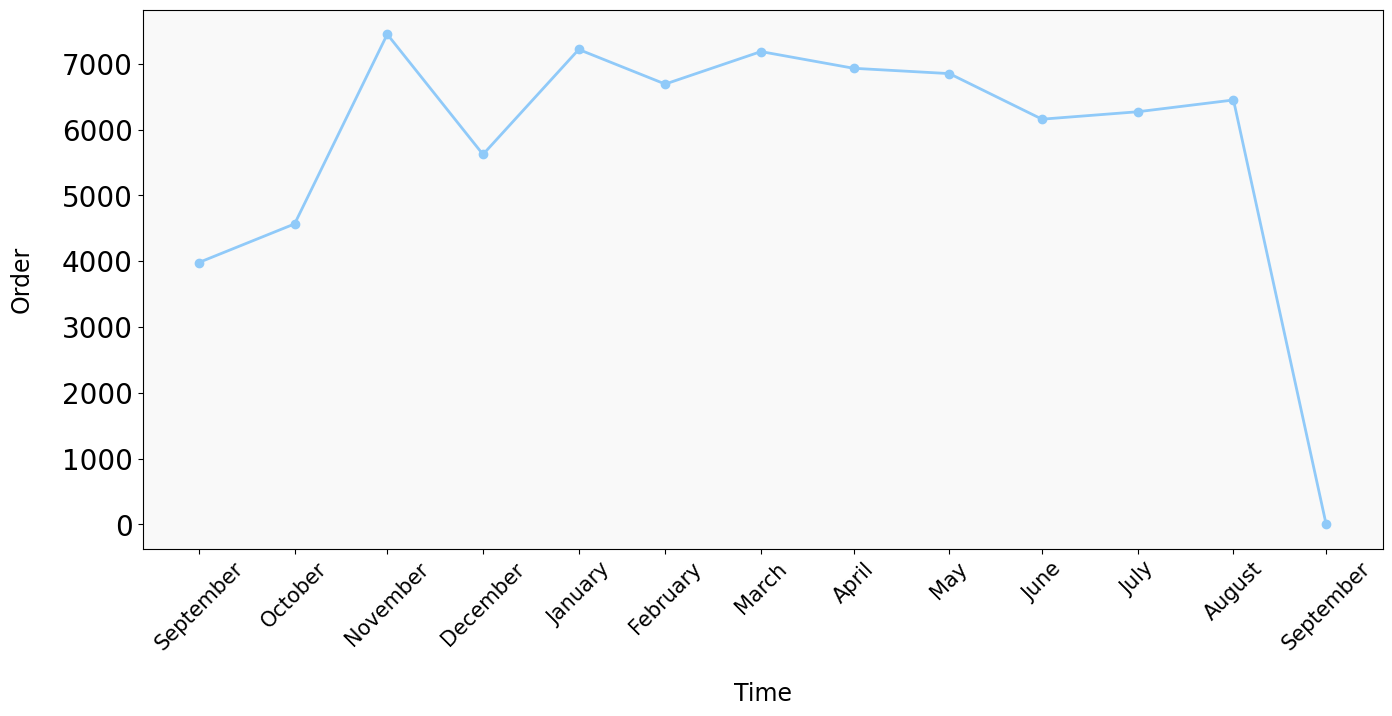

In [141]:
# membuat diagram
monthly_orders_df = all_df.resample(rule='ME', on='order_purchase_timestamp').agg({
        "order_id": "nunique",
        "payment_value": "sum"
    })
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "payment_value": "revenue"
}, inplace=True)

monthly_orders_df['month_name'] = monthly_orders_df['order_purchase_timestamp'].dt.strftime('%B')
    
fig, ax = plt.subplots(figsize=(16, 7))

ax.plot(
    monthly_orders_df["order_purchase_timestamp"],
    monthly_orders_df["order_count"],
    marker='o', 
    linewidth=2,
    color="#90CAF9"
    )
ax.set_xlabel('Time', fontsize=17,labelpad=20)
ax.set_ylabel('Order', fontsize=17,labelpad=20) 

ax.tick_params(axis='y', labelsize=20)
ax.tick_params(axis='x', rotation=45, labelsize=15)

ax.set_xticks(monthly_orders_df["order_purchase_timestamp"])
ax.set_xticklabels(monthly_orders_df['month_name'], rotation=45, fontsize=15)
ax.set_facecolor('#f9f9f9')

plt.show()

### Pertanyaan 2:

#### Menampilkan Diagram Penjualan Produk

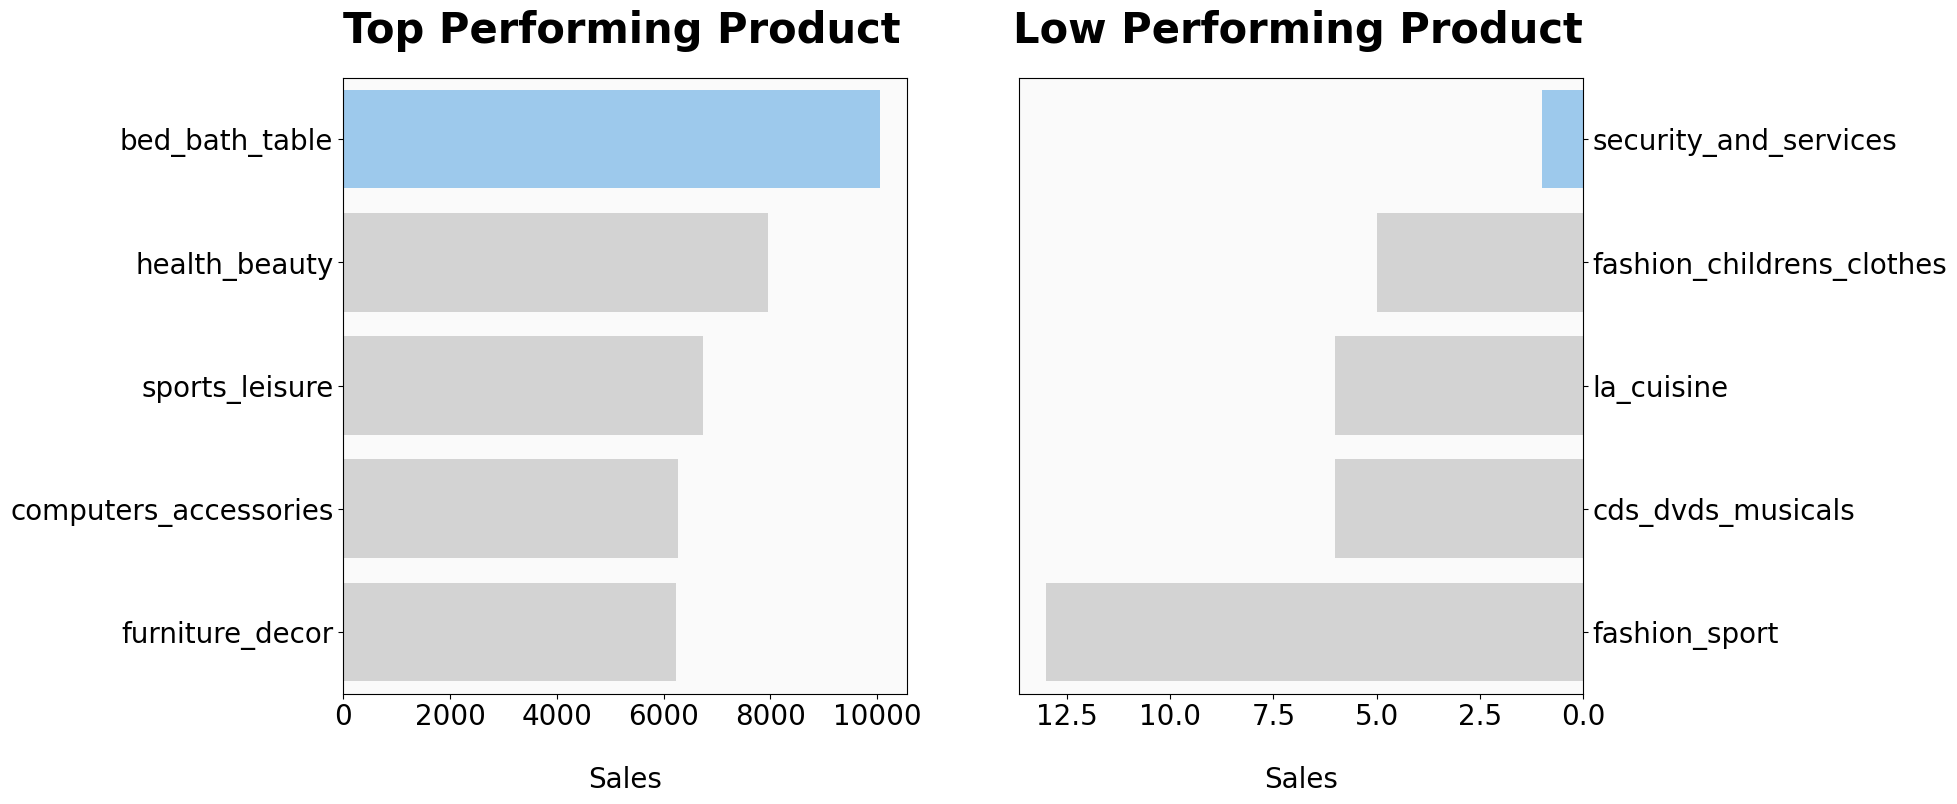

In [100]:
# membuat diagram
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
        
colors = ["#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
 
sns.barplot(x="category_count", y="product_category_name_english", hue="product_category_name_english", data=sum_product_category_name_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel("Sales", fontsize=20, labelpad=25)
ax[0].set_title("Top Performing Product", loc="left", fontsize=30, fontweight='bold', pad=25)
ax[0].tick_params(axis='y', labelsize=20)
ax[0].tick_params(axis='x', labelsize=20)
ax[0].set_facecolor('#fafafa')


sns.barplot(x="category_count", y="product_category_name_english", hue="product_category_name_english", data=sum_product_category_name_df.sort_values(by="category_count", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel("Sales", fontsize=20, labelpad=25)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Low Performing Product", loc="right", fontsize=30, fontweight='bold', pad=25)
ax[1].tick_params(axis='y', labelsize=20)
ax[1].tick_params(axis='x', labelsize=20)
ax[1].set_facecolor('#fafafa')

plt.show()

### Pertanyaan 3: Metode Pembayaran apa yang paling banyak dipakai?

In [229]:
payment_type_df.head()

,payment_type,count
0,credit_card,76795
1,boleto,19784
2,voucher,5775
3,debit_card,1529
4,not_defined,3


#### Menampilkan Diagram Metode Pembayaran 

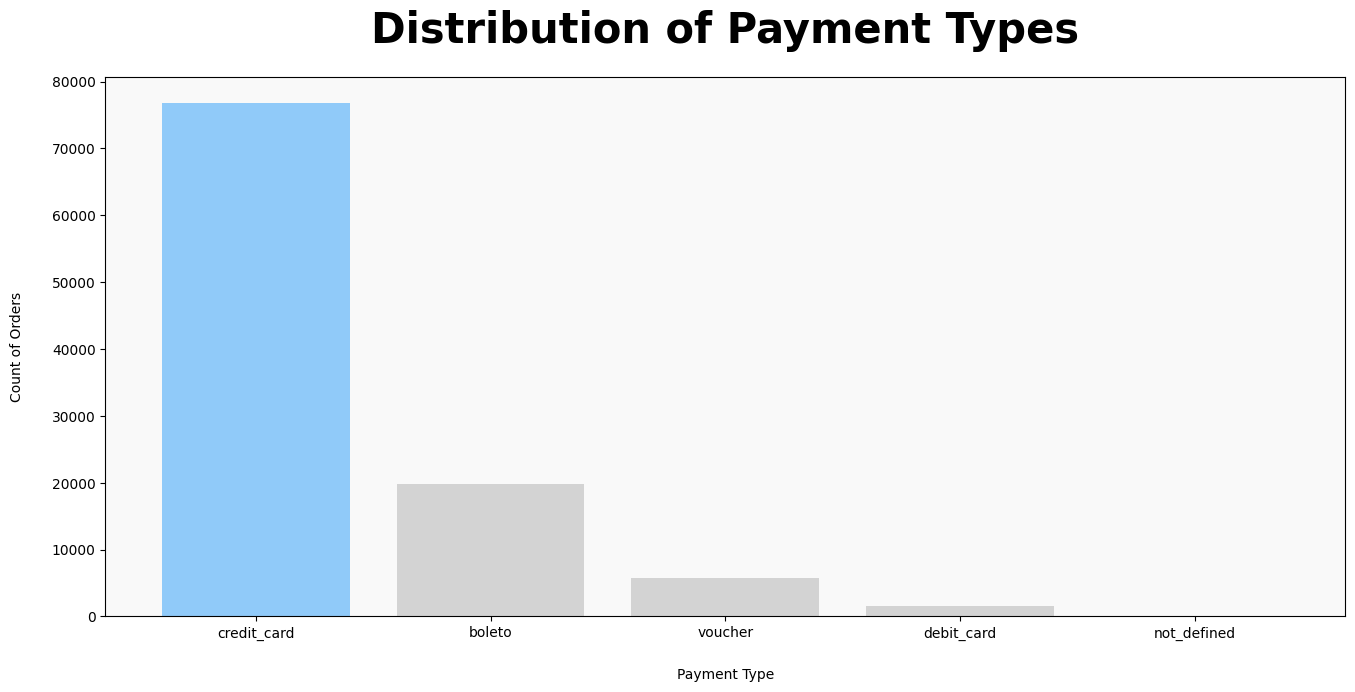

In [101]:
#membuat diagram
fig, ax = plt.subplots(figsize=(16,7))
ax.bar(
    payment_type_df['payment_type'],
    payment_type_df['count'],
    color=['#90CAF9', '#D3D3D3', '#D3D3D3','#D3D3D3']
)

ax.set_title('Distribution of Payment Types', weight='bold', fontsize=30, pad=25)
ax.set_xlabel('Payment Type', labelpad=20)
ax.set_ylabel('Count of Orders', labelpad=20)
ax.set_facecolor('#f9f9f9')

plt.show()

### Pertanyaan 4: Berapa total revenue setahun terakhir dan kapan terakhir pelanggan melakukan transaksi?

#### Total Revenue setahun terakhir

In [102]:
total_revenue = all_df['payment_value'].sum()
print(f"Total Revenue: {total_revenue}")

Total Revenue: 15673253.549999999


#### Menghitung RFM

In [103]:
# RFM Analysis

rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max", 
    "order_id": "nunique",
    "payment_value": "sum"
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
 
# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = all_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
 
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,293
1,000379cdec625522490c315e70c7a9fb,1,107.01,154
2,000419c5494106c306a97b5635748086,1,49.40,185
3,00046a560d407e99b969756e0b10f282,1,166.59,259
4,00050bf6e01e69d5c0fd612f1bcfb69c,1,85.23,351


#### Menampilkan Diagram Recency

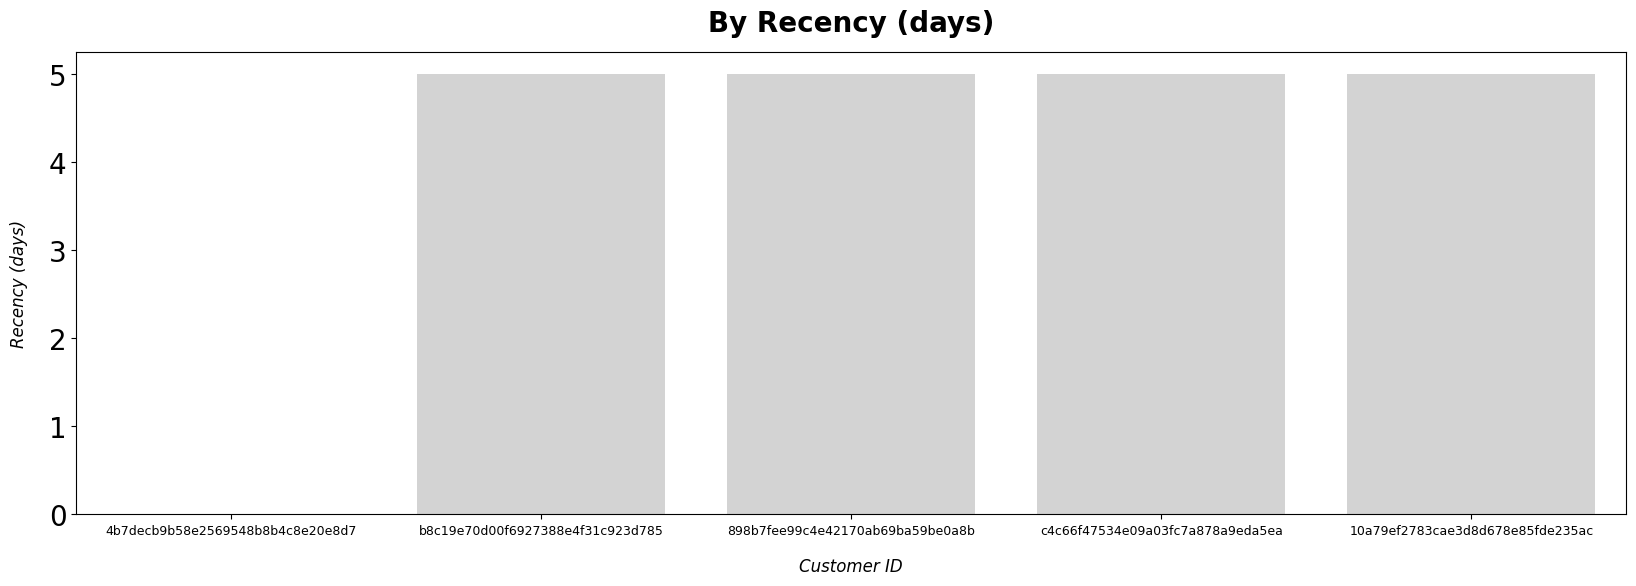

In [105]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 6))

colors = ["#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(y="recency", x="customer_id", hue="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax)

ax.set_title("By Recency (days)", loc="center", fontsize=20, fontweight='bold', pad=15)

ax.set_xlabel('Customer ID', fontsize=12, fontstyle='italic', labelpad=15) 
ax.set_ylabel('Recency (days)', fontsize=12, fontstyle='italic', labelpad=15)

ax.tick_params(axis ='x', labelsize=9)
ax.tick_params(axis ='y', labelsize=20)

plt.show()


### Pertanyaan 5 : Berapa frekuensi seorang pelanggan melakukan pembelian dalam setahun?

#### Menampilkan Diagram Frequency

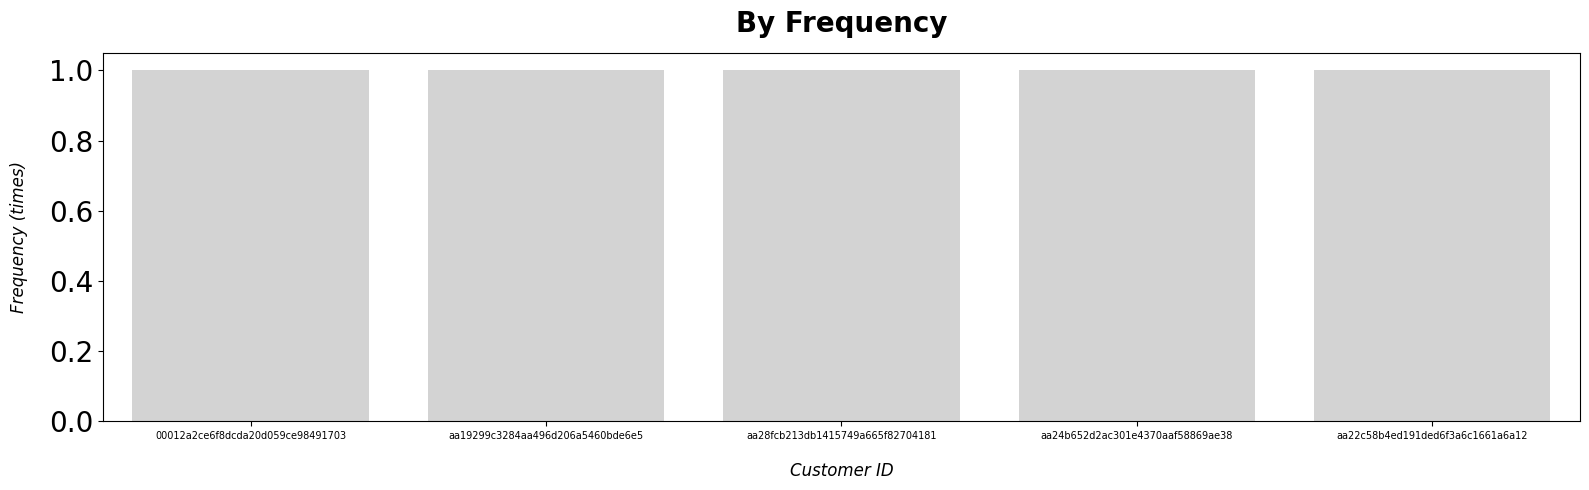

In [106]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 5))

colors = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(y="frequency", x="customer_id", hue="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax)

ax.set_title("By Frequency", loc="center", fontsize=20, fontweight='bold', pad=15)

ax.set_xlabel('Customer ID', fontsize=12, fontstyle='italic', labelpad=15) 
ax.set_ylabel('Frequency (times)', fontsize=12, fontstyle='italic', labelpad=15)

ax.tick_params(axis ='x', labelsize=7)
ax.tick_params(axis ='y', labelsize=20)
plt.tight_layout()
plt.show()

### Pertanyaan 6: Berapa banyak uang yang dihabiskan pelanggan dalam setahun terakhir?

#### Menampilkan Diagram Monetary

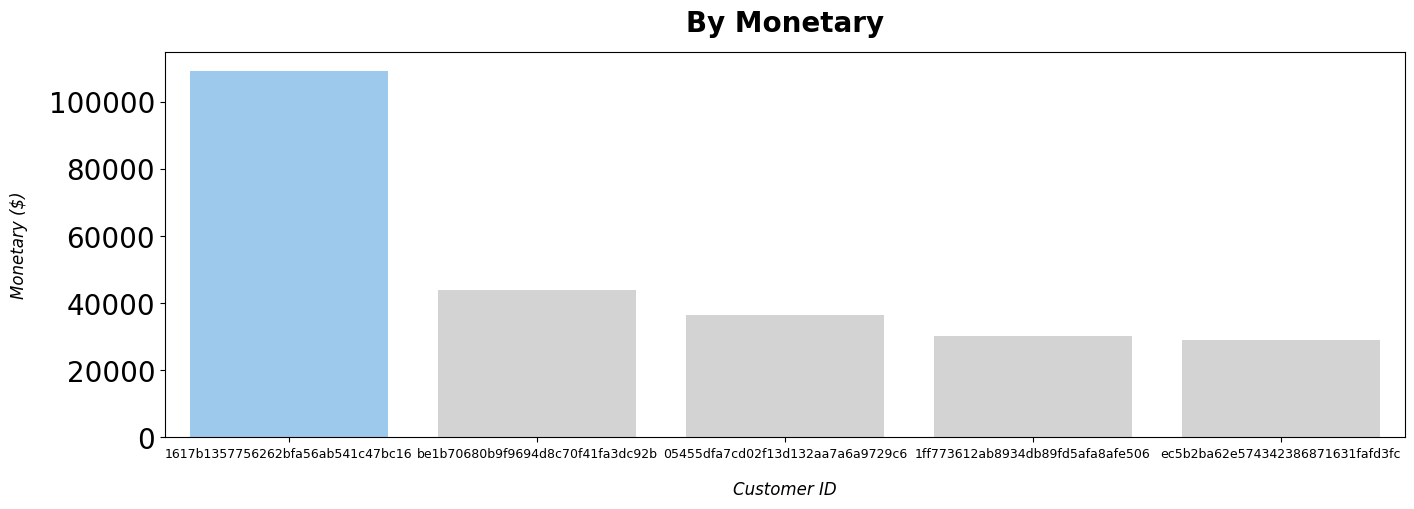

In [107]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 5))

colors = ["#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(y="monetary", x="customer_id", hue="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax)

ax.set_title("By Monetary", loc="center", fontsize=20, fontweight='bold', pad=15)

ax.set_xlabel('Customer ID', fontsize=12, fontstyle='italic', labelpad=15) 
ax.set_ylabel('Monetary ($)', fontsize=12, fontstyle='italic', labelpad=15)

ax.tick_params(axis ='x', labelsize=9)
ax.tick_params(axis ='y', labelsize=20)

plt.show()

**Insight:**
- Mayoritas pelanggan membeli keperluan bed, bath,table. Perlu dicek lebih lanjut mayoritas gender para pelanggan.
- Kartu kredit adalah alat pembayaran yang dominan, perlu dicari lebih lanjut dasar aksi pelanggan, dengan mengecek data cicilan pembayaran.


## Conclusion

1. Dari jumlah order per bulan, order meningkat di bulan duabelas tahun lalu, dan turun kembali di bulan Januari, namun order cennderung stabil setelah februari, namun belum ada order di bulan Oktober ini.  
2. Lima produk paling banyak terjual adalah bed bath table, health beauty, sport leisure, computer accessoris dan furniture; Produk paling sedikit terjual adalah security and services, diikuti oleh children clothes, CD/DVD musical, cuisine, dan fashion sport.
3. Metode pembayaran yang paling sering dipakai pelanggan adalah kartu kredit,diikuti oleh cash, voucher, dan debit card.
4. Total revenue adalah $15,673,253.55. Hari terakhir seorang pelanggan berbelanja adalah hari ini, namun kebanyakan adalah di 5 hari yang lalu.
5. Rata-rata pelanggan berbelanja 1x dalam setahun.
6. Nilai pembelanjaan tertinggi adalah di atas $100,000.